# Conversion to Jupyter Lab of sample analysis
## Heading 2
### Heading 3
The goal is to use both Jupyter Lab functionality (markdown, fewer processing resources, etc) and also show the user of Wrapper functions to print speed information for troubleshooting

In [11]:
import os
import pandas as pd
import datetime as dt

file_directory = r"C:\Users\TimMonko\Documents\GitHub\BastianLab\WorkingPython\AxonTracing_TM 2"
os.chdir(file_directory)

filepath = r"C:\Users\TimMonko\Documents\GitHub\BastianLab\WorkingPython\AxonTracing_TM 2\Combined_TM.csv"
raw_data = pd.read_csv(filepath)

In [ ]:
asoldkfhjasdf

## Clean Data Definitions 

In [20]:
# decorator (function that returns a function)
def logger(f):
    def wrapper(dataf, *args, **kwargs):
        tic = dt.datetime.now()
        result = f(dataf, *args, **kwargs)
        toc = dt.datetime.now()
        print(f"{f.__name__} took {toc - tic} {result.shape}")
        return result
    return wrapper

@logger
def start_pipeline(dataf):
    return dataf.copy() # logic of this is to not iterate always back on to df so that df remains raw for other pipelines

@logger
def remove_outliers(dataf):
    dataf = dataf.loc[dataf['Primary_Axon_Length'] < 1200]
    return dataf          

## Clean Data

In [14]:
data = (raw_data
        .pipe(start_pipeline)
        .pipe(remove_outliers)
       )
data.head()

start_pipeline took 0:00:00 (40, 6)
remove_outliers took 0:00:00.001001 (38, 6)


,Tx,Num_Branches,Total_Branch_Length,Total_Axon_Length,Primary_Axon_Length,Average_Branch_Length
0,Control,9,1495.2790,1928.270,432.9911,166.14210
1,Control,21,1314.4490,2194.806,880.3577,62.59279
2,Control,18,1889.9000,2534.234,644.3345,104.99440
3,Control,17,717.2664,1019.835,302.5689,42.19214
4,Control,24,1408.0530,2328.666,920.6129,58.66890


## Describe Data

In [15]:
data.groupby("Tx").describe().T

Tx                               Control          DFO
Num_Branches          count    19.000000    19.000000
                      mean     22.631579    31.263158
                      std      14.438415    20.577339
                      min       5.000000     4.000000
                      25%      13.500000    17.000000
                      50%      18.000000    29.000000
                      75%      25.500000    39.500000
                      max      57.000000    87.000000
Total_Branch_Length   count    19.000000    19.000000
                      mean   1198.772105  1088.082742
                      std     573.189892   398.929044
                      min     267.116900   298.121200
                      25%     873.145250   871.552300
                      50%    1089.327000  1033.484000
                      75%    1462.522500  1285.370000
                      max    2905.940000  1829.142000
Total_Axon_Length     count    19.000000    19.000000
                      mean   1756.932011  1631.145721
                      std     678.230261   458.655991
                      min     567.592300   713.156700
                      25%    1344.741500  1260.610000
                      50%    1873.884000  1618.059000
                      75%    2125.847000  2029.881500
                      max    3519.010000  2242.794000
Primary_Axon_Length   count    19.000000    19.000000
                      mean    558.159921   543.062911
                      std     210.594104   180.924612
                      min     300.475500   281.945600
                      25%     383.248750   431.912500
                      50%     506.517200   500.293300
                      75%     671.086050   689.419700
                      max     967.561200   921.822600
Average_Branch_Length count    19.000000    19.000000
                      mean     66.013915    48.065165
                      std      37.354924    28.099219
                      min      16.685330    11.606760
                      25%      41.268790    29.036340
                      50%      53.423370    33.712540
                      75%      85.949345    75.842590
                      max     166.142100   105.656500

## Stats

In [17]:
import pingouin as pg

def dv_tests(df, dv, iv):
    norm = pg.normality(data = df, dv = dv, group = iv) # Normal distriubtion of population assumed true in ANOVA/T
    
    hs = pg.homoscedasticity(data = df, dv = dv, group = iv) # Homogeneity of Variances (ANOVA/T assumption is true)

    lr = pg.anova(data = df, dv = dv, between = iv)
    print(dv + ' x ' + iv, norm, hs, lr, sep = '\n')
    
for dvs in data.columns[data.columns != 'Tx']:
    dv_tests(data, dvs, 'Tx')

Num_Branches x Tx
                W      pval  normal
Control  0.872322  0.015823   False
DFO      0.914158  0.088281    True
               W     pval  equal_var
levene  1.006072  0.32254       True
  Source  ddof1  ddof2         F     p-unc       np2
0     Tx      1     36  2.240213  0.143179  0.058583
Total_Branch_Length x Tx
                W      pval  normal
Control  0.908036  0.068140    True
DFO      0.960764  0.587521    True
               W      pval  equal_var
levene  0.845303  0.364004       True
  Source  ddof1  ddof2         F     p-unc       np2
0     Tx      1     36  0.477332  0.494064  0.013086
Total_Axon_Length x Tx
                W      pval  normal
Control  0.963746  0.648011    True
DFO      0.938182  0.244480    True
               W      pval  equal_var
levene  1.312404  0.259519       True
  Source  ddof1  ddof2         F     p-unc       np2
0     Tx      1     36  0.448447  0.507346  0.012304
Primary_Axon_Length x Tx
                W      pval  normal
Contr

In [18]:
#%% Seaborn Settings for Plotting
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator # https://github.com/trevismd/statannotations
#statsannotations for the future https://levelup.gitconnected.com/statistics-on-seaborn-plots-with-statannotations-2bfce0394c00

# must explicitely invoke set_them else uses matplotlib defaults. Overrides all matplotlib based plots
sns.set_theme(style = "darkgrid", context = "notebook", palette = "colorblind") 

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Control vs. DFO: Mann-Whitney-Wilcoxon test two-sided, P_val:1.443e-01 U_stat=1.300e+02


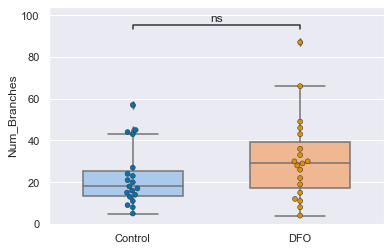

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Control vs. DFO: Mann-Whitney-Wilcoxon test two-sided, P_val:5.593e-01 U_stat=2.010e+02


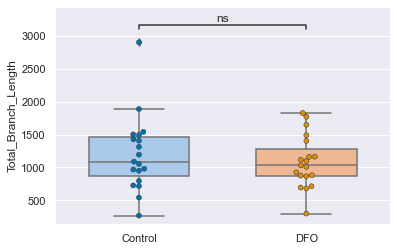

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Control vs. DFO: Mann-Whitney-Wilcoxon test two-sided, P_val:6.404e-01 U_stat=1.970e+02


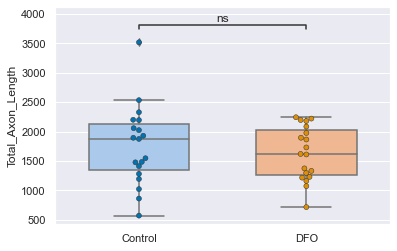

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Control vs. DFO: Mann-Whitney-Wilcoxon test two-sided, P_val:8.839e-01 U_stat=1.860e+02


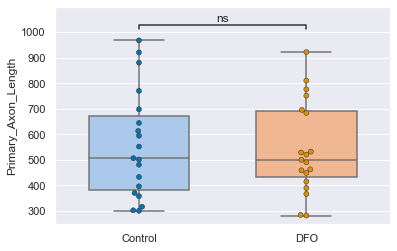

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Control vs. DFO: Mann-Whitney-Wilcoxon test two-sided, P_val:8.498e-02 U_stat=2.400e+02


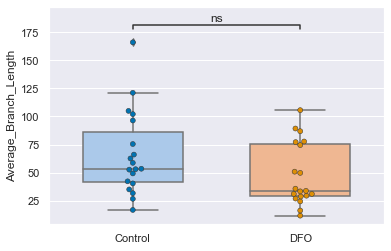

In [19]:
#%% Discrete plotting

def box_swarm_plot(x, y, data, ylabel):
    ax = sns.boxplot(x = x, y = y, data = data,
                     width = 0.6, palette = 'pastel')

    ax = sns.swarmplot(x = x , y = y, data = data,
                       edgecolor = 'gray', linewidth = None)

    ax.set_xlabel(None)
    ax.set_ylabel(ylabel)
    annotator = Annotator(ax, pairs = [("Control", "DFO")], data = data, x = x, y = y)
    annotator.configure(test = 'Mann-Whitney', text_format = 'star', loc = 'inside')
    annotator.apply_and_annotate()
    return ax

plots = []

#box_swarm_plot('Tx', 'Num_Branches', data, 'Num_Branches')

for dvs in data.columns[data.columns != 'Tx']:
    plot = box_swarm_plot('Tx', dvs, data, dvs)
    plt.show()
    plots.append(plot)

# plots[0].figure.savefig('box.svg') # to call from list

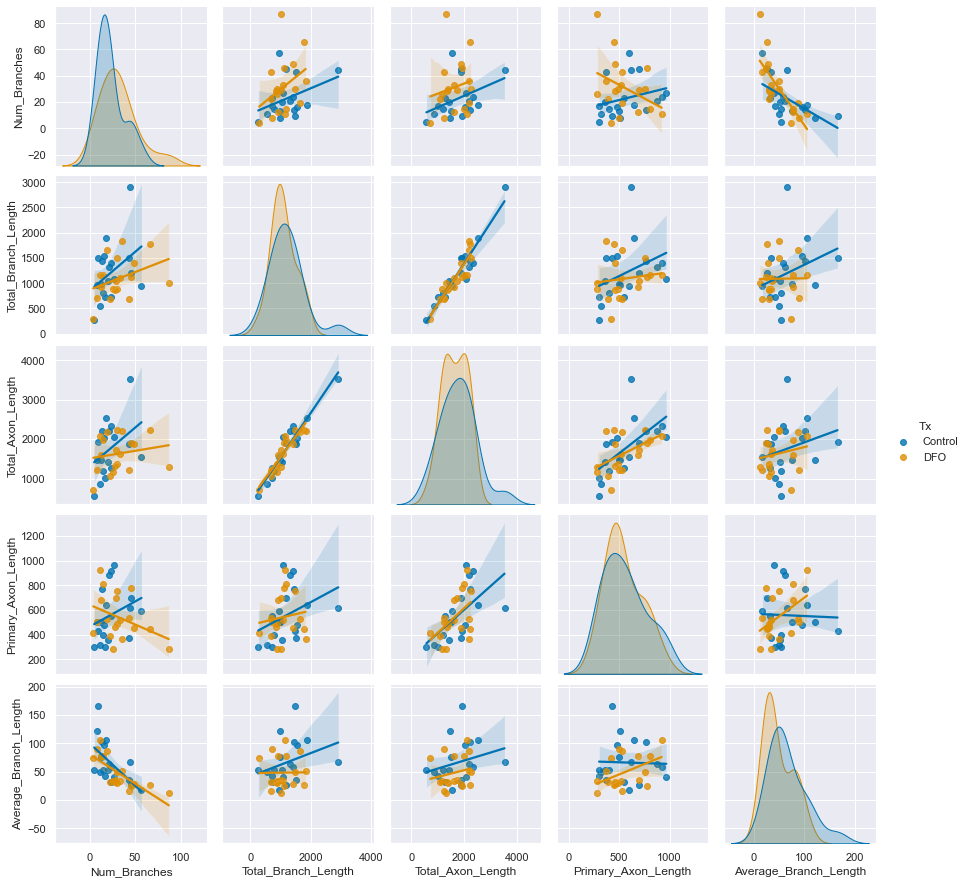

In [79]:
#%% PairGrid relationship plot
#quick and dirty

pp = sns.pairplot(data, hue = "Tx", kind = 'reg') # default is scatter


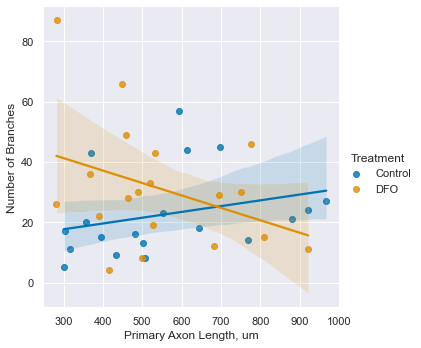

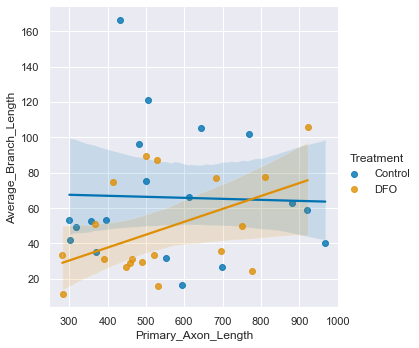

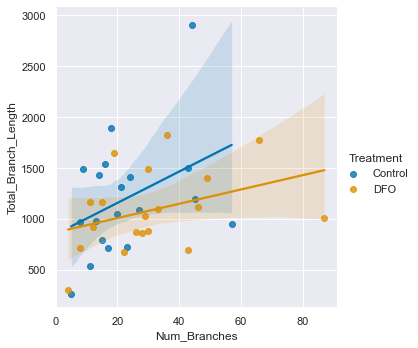

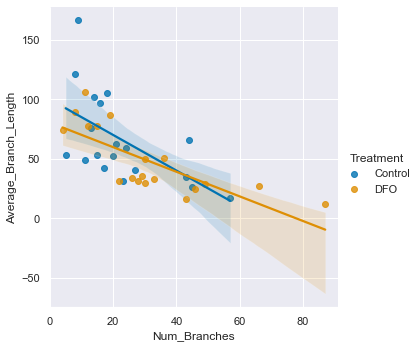

In [80]:
#%% Seaborn Relational Plotting

def lm_plot(x, y, data = data, hue = 'Tx'):
    r = sns.lmplot(x = x, y = y, data = data, hue = hue)
    r.legend.set_title("Treatment")
    return r

r = lm_plot("Primary_Axon_Length", "Num_Branches")
r.axes[0,0].set_xlabel("Primary Axon Length, um")
r.axes[0,0].set_ylabel("Number of Branches")
r = lm_plot(x = "Primary_Axon_Length", y= "Average_Branch_Length")
r = lm_plot("Num_Branches", "Total_Branch_Length")
r = lm_plot(x = "Num_Branches", y = "Average_Branch_Length")

plt.show()
r.figure.savefig('LmPlot.svg')

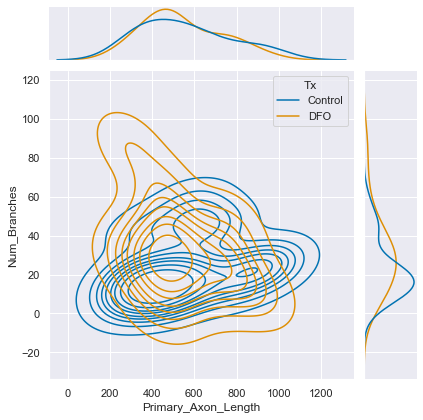

In [81]:
#%% Kde plot

j = sns.jointplot(
    data = data,
    x = 'Primary_Axon_Length',
    y = 'Num_Branches',
    hue = 'Tx',
    kind = "kde")

In [82]:
#%% Tidy Data statsmodels stats 
# R like syntax, much more robust, but more complex 
# https://www.statsmodels.org/stable/gettingstarted.html

import statsmodels.api as sm 
from statsmodels.formula.api import ols

# OLS model -- a "complicated" look at ANOVA stats, C() forces categorical


model = ols('Num_Branches ~ Primary_Axon_Length * C(Tx)', data = data).fit()
model = ols('Primary_Axon_Length ~ Num_Branches * C(Tx)', data = data).fit()
model = ols('Num_Branches ~ Average_Branch_Length * C(Tx)', data = data).fit()

#print(model.summary()) # very overwhelming output
# So, push the model through the ANOVA to simplify the output 
anova_table = sm.stats.anova_lm(model, typ = 2) # Type 2 Sum iof Squares if no intereaction b/w independent variables, Type 3 if there is interaction. Never use Type 1. Type 3 appears to be same as regression
anova_table

# Outliers with statsmodels
#test = model.outlier_test()
#outliers_test = test[test['bonf(p)'] < 0.05]

,sum_sq,df,F,PR(>F)
C(Tx),54.067984,1.0,0.319402,0.575678
Average_Branch_Length,4624.660828,1.0,27.319801,0.000009
Average_Branch_Length:C(Tx),993.968191,1.0,5.871785,0.020860
Residual,5755.476244,34.0,NaN,NaN


In [83]:
#%% Multivariate statsmodels

from statsmodels.multivariate.manova import MANOVA

fit = MANOVA.from_formula('Num_Branches * Primary_Axon_Length ~ C(Tx)', data = data)
print(fit.mv_test())

pg.box_m(data, dvs = ['Num_Branches', 'Primary_Axon_Length'], group = 'Tx')

                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept         Value  Num DF  Den DF F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda  0.0740 3.0000 34.0000 141.8653 0.0000
         Pillai's trace  0.9260 3.0000 34.0000 141.8653 0.0000
 Hotelling-Lawley trace 12.5175 3.0000 34.0000 141.8653 0.0000
    Roy's greatest root 12.5175 3.0000 34.0000 141.8653 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
           C(Tx)          Value  Num DF  Den DF F Value Pr > F
--------------------------------------------------------------
            Wilks' lambda 0.8957 3.0000 34.0000  1.3193 0.2841
           Pillai's trace 0.1043 3.0000 34.0000  1.3193 0.2841
   Hotellin

,Chi2,df,pval,equal_cov
box,6.061441,3.0,0.108659,True
